In [1]:
import emcee
from scipy.optimize import minimize
import corner
import ptemcee
import subprocess
import pandas as pd

In [2]:
import os, sys
sys.path.append('/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/')
import numpy as np
import matplotlib.pyplot as plt
import run_simple_energy_loss

In [3]:
simulation=run_simple_energy_loss.run_simulation

In [4]:
pT_range = (1, 10, 10) # Compute more observable than needed to avoid boundry unstabilities.
pT_obs = [3, 5, 7] # p_T Observables we will use for the analysis

In [5]:
from emukit.core import ParameterSpace, ContinuousParameter

In [6]:
prior_ranges= {'alpha_s':(0.05,0.5), 'exponent_inel':(-3,3), 'exponent_el':(-3,3), 'scale_inel':(0.1, 0.5), 'scale_el':(0.1, 0.5)}
true_values= {'alpha_s': 0.2, 'exponent_inel': -1, 'exponent_el': 1, 'scale_inel': 0.3, 'scale_el': 0.3}
name_to_position =  {'alpha_s':0, 'exponent_inel':1, 'exponent_el':2, 'scale_inel':3, 'scale_el':4}

In [7]:
# We will generate observable for these model parametr values and consider them as experimental data
# We will generate observables for these model parameter values and consider them as experimental data
truth = np.array([true_values['alpha_s'],  true_values['exponent_inel'],
                 true_values['exponent_el'],true_values['scale_inel'],true_values['scale_el']]).reshape(1,-1)

Working on design 1


/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning: dopri5: larger nsteps is needed
  self.messages.get(istate, unexpected_istate_msg)))
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res_quad2b=scipy.integrate.quad(lambda u, p=p: p*integrand_middle(p,u), 0, delta, limit=npts, epsabs=epsabs, epsrel=epsrel)
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res_quad2a=scipy.integrate.quad(vec_integrand, pmin, p, limit=npts, epsabs=epsabs, epsrel=epsrel)


Text(0.5, 1.0, 'Experimental observations')

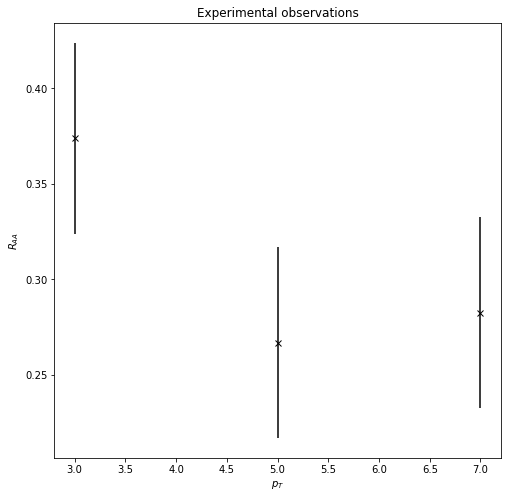

In [8]:
# Set seed for reproducibility.
seed = 42
np.random.seed(seed)

# Generate some synthetic data from the model.
x = np.array(pT_obs)
N = len(x)
obserr = 0.05 # Amplitude of noise term
obs = simulation(truth, *pT_range)[:,pT_obs] # True model
obs += obserr * np.random.randn(N) # Add some random noise

# Now plot it to see what the data looks like
fig, ax = plt.subplots(figsize=(8,8))

ax.errorbar(x.flatten(), obs.flatten(), yerr=obserr, fmt="xk", capsize=0)
#ax.plot(x.flatten(), obs.flatten(), "k", alpha=0.3, lw=3)
#ax.set_xlim(0, 10)
ax.set_xlabel(r"$p_T$")
ax.set_ylabel(r"$R_{AA}$")
ax.set_title('Experimental observations')

In [9]:
parameter_space = ParameterSpace([ContinuousParameter('alpha_s', 0.05,0.5 ),
                                  ContinuousParameter('exponent_inel', -3, 3),
                                  ContinuousParameter('exponent_el', -3, 3),
                                  ContinuousParameter('scale_inel', 0.1, 0.5),
                                  ContinuousParameter('scale_el', 0.1, 0.5)])

In [10]:
from emukit.core.initial_designs import RandomDesign

design = RandomDesign(parameter_space)
num_data_points = 5
X = design.get_samples(num_data_points)
print(f'Shape of X {X.shape}')

Shape of X (5, 5)


In [11]:
def f(design, pT=pT_obs[0]):
    """returns simulation output for a design matrix"""
    print(design)
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT]

def f1(design, pT=pT_obs[0]):
    """returns simulation output for a design matrix"""
    print(design)
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

def f2(design, pT=pT_obs[1]):
    """returns simulation output for a design matrix"""
    print(design)
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

def f3(design, pT=pT_obs[2]):
    """returns simulation output for a design matrix"""
    print(design)
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

fun=np.array([f1, f2, f3])

In [12]:
#Generate 5 randome observables
Y = f(X,pT_obs)

[[ 0.12020839  1.24843547 -1.9090502   0.21649166  0.28242799]
 [ 0.12019753 -2.87649303 -1.89957294  0.34474116  0.41407038]
 [ 0.07613763  2.81945911 -1.17454654  0.15579754  0.17986951]
 [ 0.43977927  1.99465584  0.14853859  0.21685786  0.30569378]
 [ 0.32050176 -1.72596534 -0.40832989  0.24654474  0.33696583]]
Working on design 1
Working on design 2
Working on design 3
Working on design 4
Working on design 5


/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:42: RuntimeWarning: invalid value encountered in log
  log_P_g_prev=np.log(P_g)
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:74: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  res_quad2c=scipy.integrate.quad(vec_integrand, p, pmax, limit=npts, epsabs=epsabs, epsrel=epsrel)
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:79: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  res_quad2c=scipy.integrate.quad(vec_integrand, p*(1+delta), pmax, limit=npts, epsabs=epsabs, epsrel=epsrel)
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning: The occurr

In [13]:
from GPy.kern import RBF, White
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
from multiprocessing import Pool

In [14]:
from scipy.optimize import minimize
import corner
import numpy as np
#import ptemcee
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from emukit.core import ParameterSpace, ContinuousParameter
from GPy.models import MultioutputGP
from GPy import likelihoods
from emukit.model_wrappers import GPyMultiOutputWrapper
from GPy.kern import RBF, White
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
from GPy.kern.src.multioutput_kern import MultioutputKern
import seaborn as sns

import random
random.seed(42)

from emukit.experimental_design.acquisitions.contour_MultiObs_min import contourMinEI
from emukit.experimental_design.acquisitions.contour_1D import contour1D
from emukit.experimental_design import ExperimentalDesignLoop
from emukit.core.optimization import GradientAcquisitionOptimizer

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from pyDOE import *
from scipy.stats import norm
from scipy import integrate
import corner

import math
%matplotlib inline 

from emcee.ptsampler import PTSampler

# set seaborn style
sns.set_style("white")

### Build multi-output emulator using Gpy for 3 observables.

In [15]:
# size of possible variation of parameters
# ptp = np.array([prior_ranges['alpha_s'][1],prior_ranges['exponent_inel'][1],prior_ranges['exponent_el'][1],prior_ranges['scale_inel'][1],prior_ranges['scale_el'][1]])\
# -np.array([prior_ranges['alpha_s'][0],prior_ranges['exponent_inel'][0],prior_ranges['exponent_el'][0],prior_ranges['scale_inel'][0],prior_ranges['scale_el'][0]])
 
# # Put ARD true to select relevent dimensions automatically 
# kernel1 = RBF(input_dim=5, lengthscale=ptp, ARD=True)
# kernel2 = RBF(input_dim=5, lengthscale=ptp, ARD=True)
# kernel3 = RBF(input_dim=5, lengthscale=ptp, ARD=True)
# model_gpy = MultioutputGP([X,X,X],[Y[:,i].reshape(-1,1) for i in range(0,Y.shape[1])],
#                           likelihood_list=[likelihoods.Gaussian(variance=1,name='Gaussian_noise'),
#                                            likelihoods.Gaussian(variance=1,name='Gaussian_noise'),
#                                            likelihoods.Gaussian(variance=1,name='Gaussian_noise')],
#                             kernel_list=[kernel1,kernel2,kernel3])
# model_emukit = GPyMultiOutputWrapper(model_gpy, n_outputs=3, n_optimization_restarts=10, 
#                                         verbose_optimization = True, parallel=True, num_processes=8)
# model_emukit.optimize()
# print(model_emukit.gpy_model)

In [16]:
n_init = 10
n_total = 20
alpha_list = [[0.1, 0.1, 0.1], [1, 1, 1]]
w_list = [0.5, 0.5, 0.5]

In [17]:
a_list = [obs[:,i].reshape(-1,1) for i in range(0,obs.shape[1])]

In [18]:
# Define the logprior function
def logPrior(theta):
    
    # Model parameters
    theta = np.array(theta)
    alpha_s, exp_inel, exp_el, sc_inel, sc_el = theta 
    
    # Probability of model parameters: flat prior
    if prior_ranges['alpha_s'][0] < alpha_s < prior_ranges['alpha_s'][1] \
        and prior_ranges['exponent_inel'][0] < exp_inel < prior_ranges['exponent_inel'][1] \
        and prior_ranges['exponent_el'][0] < exp_el < prior_ranges['exponent_el'][1]\
        and prior_ranges['scale_inel'][0] < sc_inel < prior_ranges['scale_inel'][1] \
        and prior_ranges['scale_el'][0] < sc_el < prior_ranges['scale_el'][1]:
        return 0.0
    return -np.inf

In [19]:
# Define logprobability function: l(D|theta) * p(theta)
# Note: use this for emcee, not approxposterior!
def logposterior(theta, x, obs, obserr):
        
    lp = logPrior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + logLikelihood(theta, x, obs, obserr)

Optimization restart 1/10, f = -1.430475328847855
Optimization restart 2/10, f = -0.9985325688553734
Optimization restart 3/10, f = 2.4214490121463834
Optimization restart 4/10, f = -1.43047538102189
Optimization restart 5/10, f = 2.4214489819221336
Optimization restart 6/10, f = 2.507094422286502
Optimization restart 7/10, f = -1.4304740347587241
Optimization restart 8/10, f = 6.722666673628225
Optimization restart 9/10, f = -1.2333317203182874
Optimization restart 10/10, f = -1.4304753322093973

Name : gp
Objective : -1.43047538102189
Number of Parameters : 21
Number of Optimization Parameters : 21
Updates : True
Parameters:
  gp.                                               |                   value  |  constraints  |  priors
  MultioutputDerivativeKern.rbf.variance            |     0.26436320229486326  |      +ve      |        
  MultioutputDerivativeKern.rbf.lengthscale         |                    (5,)  |      +ve      |        
  MultioutputDerivativeKern.rbf_1.variance        

 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/10, f = -2.2679550101621686
Optimization restart 2/10, f = 1.6455985896247274
Optimization restart 3/10, f = -2.8154159268509282
Optimization restart 4/10, f = 6.429815419065047
Optimization restart 5/10, f = 1.7657283853435732
Optimization restart 6/10, f = -2.6511752797661785
Optimization restart 7/10, f = 1.6455986066346533
Optimization restart 8/10, f = -2.695291503319945
Optimization restart 9/10, f = 6.7747709672174015
Optimization restart 10/10, f = -1.6121562908762161

Name : gp
Objective : -2.8154159268509282
Number of Parameters : 21
Number of Optimization Parameters : 21
Updates : True
Parameters:
  gp.                                               |                   value  |  constraints  |  priors
  MultioutputDerivativeKern.rbf.variance            |     0.21591155413910854  |      +ve      |        
  MultioutputDerivativeKern.rbf.lengthscale         |                    (5,)  |      +ve      |        
  MultioutputDerivativeKern.rbf_1.variance    

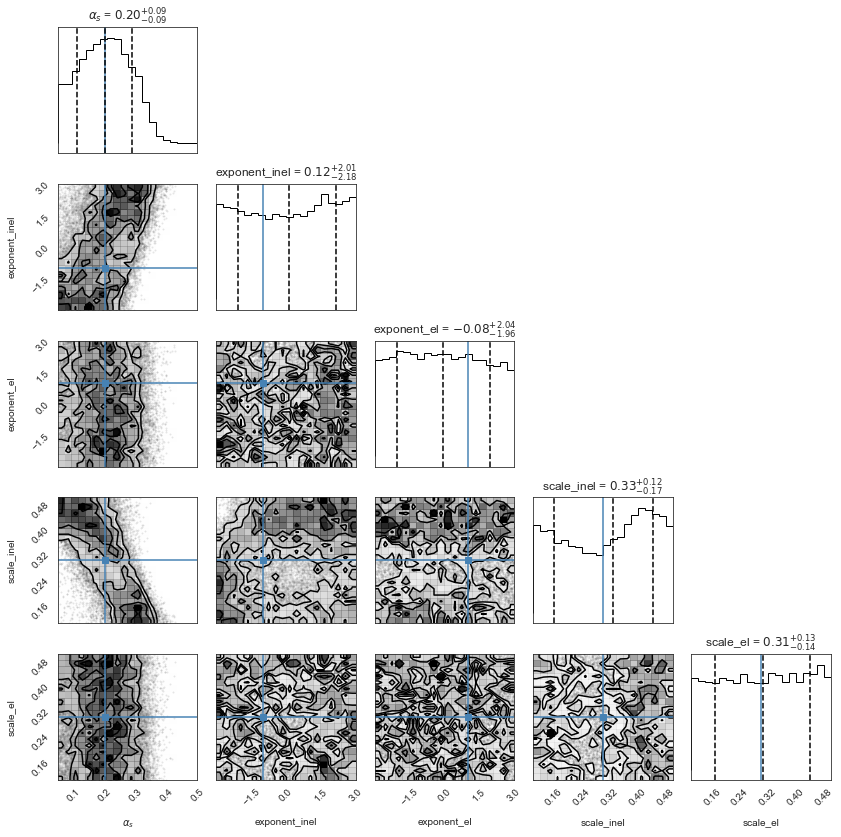

[array([[ 0.40288423, -1.78405847, -0.55066906,  0.17574249,  0.42678738]]), array([[5.26727108e-30]])]
[[ 0.40288423 -1.78405847 -0.55066906  0.17574249  0.42678738]]
Working on design 1


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved

Optimization restart 1/10, f = -3.972879847083039
Optimization restart 2/10, f = -2.9540301313130257
Optimization restart 3/10, f = -2.5718881710208823
Optimization restart 4/10, f = -1.1400835282187405
Optimization restart 5/10, f = -6.72748596229393
Optimization restart 6/10, f = -1.140083530923457
Optimization restart 7/10, f = -2.4955858361965113
Optimization restart 8/10, f = -3.972879908213592
Optimization restart 9/10, f = -6.727485936933903
Optimization restart 10/10, f = -9.474052958322234

Name : gp
Objective : -9.474052958322234
Number of Parameters : 21
Number of Optimization Parameters : 21
Updates : True
Parameters:
  gp.                                               |                  value  |  constraints  |  priors
  MultioutputDerivativeKern.rbf.variance            |    0.17529335229314974  |      +ve      |        
  MultioutputDerivativeKern.rbf.lengthscale         |                   (5,)  |      +ve      |        
  MultioutputDerivativeKern.rbf_1.variance        

 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:Extremely bad integrand behavior occurs at some points of the
  integration interval.


For model parameters [ 0.28566245 -2.47512237  1.50092894  0.35726458  0.1177329 ] takes 81.58856296539307 S
Optimization restart 1/10, f = -11.719739402840123
Optimization restart 2/10, f = -8.845224381508618
Optimization restart 3/10, f = -5.562727323068911
Optimization restart 4/10, f = -5.562726907647168
Optimization restart 5/10, f = -8.845223677782043
Optimization restart 6/10, f = -8.437266591000073
Optimization restart 7/10, f = -11.64674188145332
Optimization restart 8/10, f = -8.412795599904646
Optimization restart 9/10, f = -11.719769240986045
Optimization restart 10/10, f = -14.382666097808869

Name : gp
Objective : -14.382666097808869
Number of Parameters : 21
Number of Optimization Parameters : 21
Updates : True
Parameters:
  gp.                                               |                   value  |  constraints  |  priors
  MultioutputDerivativeKern.rbf.variance            |     0.15824189195690538  |      +ve      |        
  MultioutputDerivativeKern.rbf.lengthscal

In [ ]:
#from GPy.kern.src.multioutput_kern import ZeroKern
bayesian_inference=True
batch_size = 5
max_iterations = int((n_total-n_init))
ptp = np.array([prior_ranges['alpha_s'][1],prior_ranges['exponent_inel'][1],prior_ranges['exponent_el'][1],prior_ranges['scale_inel'][1],prior_ranges['scale_el'][1]])\
-np.array([prior_ranges['alpha_s'][0],prior_ranges['exponent_inel'][0],prior_ranges['exponent_el'][0],prior_ranges['scale_inel'][0],prior_ranges['scale_el'][0]])


for runNo in range(0,2):
    X_init = np.array(X)
    Y_init = np.array(Y)

    # Put ARD true to select relevent dimensions automatically 
    kernel1 = RBF(input_dim=5, lengthscale=ptp, ARD=True)
    kernel2 = RBF(input_dim=5, lengthscale=ptp, ARD=True)
    kernel3 = RBF(input_dim=5, lengthscale=ptp, ARD=True)
    model_gpy = MultioutputGP([X_init,X_init,X_init],[Y_init[:,i].reshape(-1,1) for i in range(0,Y_init.shape[1])],
                              likelihood_list=[likelihoods.Gaussian(variance=1,name='Gaussian_noise'),
                                               likelihoods.Gaussian(variance=1,name='Gaussian_noise'),
                                               likelihoods.Gaussian(variance=1,name='Gaussian_noise')],
                                kernel_list=[kernel1,kernel2,kernel3])
    model_emukit = GPyMultiOutputWrapper(model_gpy, n_outputs=3, n_optimization_restarts=10, 
                                            verbose_optimization = True, parallel=True, num_processes=8)
    model_emukit.optimize()
    print(model_emukit.gpy_model)    
    contour_MD = contourMinEI(modelwrapper = model_emukit, a_list = a_list, alpha_list = alpha_list[runNo],
                              w_list = w_list)
    expdesign_loop = ExperimentalDesignLoop(model = model_emukit,
                                             space = parameter_space,
                                             acquisition = contour_MD,
                                             batch_size = batch_size)

    #---# loop to generate designs
    for i in range(0,max_iterations+1):  
        # Compute next point
        optimizer = GradientAcquisitionOptimizer(parameter_space)
        xnew, opt_acq = optimizer.optimize(contour_MD)
        print([xnew,opt_acq])
        X_init = np.vstack([X_init, xnew])
        y_new = f(xnew,pT_obs)
        Y_init = np.vstack([Y_init, y_new])
        model_gpy = MultioutputGP([X_init,X_init,X_init],[Y_init[:,i].reshape(-1,1) for i in range(0,Y_init.shape[1])],
                              likelihood_list=[likelihoods.Gaussian(variance=1,name='Gaussian_noise'),
                                               likelihoods.Gaussian(variance=1,name='Gaussian_noise'),
                                               likelihoods.Gaussian(variance=1,name='Gaussian_noise')],
                                kernel_list=[kernel1,kernel2,kernel3])
        model_emukit = GPyMultiOutputWrapper(model_gpy, n_outputs=3, n_optimization_restarts=10, 
                                            verbose_optimization = True, parallel=True, num_processes=8)
        model_emukit.optimize()
        print(model_emukit.gpy_model)
        contour_MD = contourMinEI(modelwrapper = model_emukit, a_list = a_list, alpha_list = alpha_list[runNo],
                                  w_list = w_list)
        #print(f'i devide by batch size remainder {i%batch_size}')
        if bayesian_inference==False or (i%batch_size!=0):
            print('Skip Bayesian Inference')
            continue;

        def emu_predict(xx, obsno):
            """This function handles the scaling and GP interpolation together, 
            returning our prediction in the ordinary observable space
            rather than the scaled observable space.
            This map is what we call our 'emulator'. """
            X = xx.reshape(-1, ndim)
            new_column = [[obsno]]*len(X)
            pred_temp = model_emukit.predict(np.append(X,new_column,axis=1))
            y = pred_temp[0] # vector of predictive means
            s2_vec = pred_temp[1]
            dy = np.sqrt(s2_vec)
            return y, dy

        # Define the loglikelihood function
        def logLikelihood(theta, x, obs, obserr):

            # Model parameters
            theta = np.array(theta)

            #alpha_s, mD_factor, exponent_inel, exponent_el = theta
            alpha_s, exp_inel, exp_el, sc_inel, sc_el = theta
            design = np.array([alpha_s, exp_inel, exp_el, sc_inel, sc_el]).reshape(1,-1)

            # Model predictions given parameters

            model = np.array([emu_predict(design,0),emu_predict(design,1),emu_predict(design,2)],dtype=object)
            modelerr = model[:,1]
            model = model[:,0]

            # Likelihood of data given model parameters

            term2 = 0.5*(2*np.pi*np.sqrt(np.sum(obserr**2+modelerr.flatten()**2)))
            return -0.5*np.sum((obs.flatten()-model.flatten())**2/(obserr**2+modelerr.flatten()**2)) - term2

        # ptemcee
        ntemps = 30
        Tmax = 50

        nwalkers = 20 #guidance is 10*d
        ndim = 5
        nburnin = 200
        niterations= 1000
        nthin = 1#0 # only record every nthin iteration

        nthreads = 10

        min_theta = np.array([prior_ranges['alpha_s'][0],prior_ranges['exponent_inel'][0],
                              prior_ranges['exponent_el'][0],prior_ranges['scale_inel'][0],
                              prior_ranges['scale_el'][0]])
        max_theta = np.array([prior_ranges['alpha_s'][1],prior_ranges['exponent_inel'][1],
                              prior_ranges['exponent_el'][1],prior_ranges['scale_inel'][1],
                              prior_ranges['scale_el'][1]])

        # Data and uncertainties that we use to condition our model
        args = (x, obs, obserr) # recall x = np.array(pT_obs)

        ptsampler=ptemcee.Sampler(nwalkers, ndim, logLikelihood, logPrior, ntemps, 
                            threads=nthreads, Tmax=Tmax, loglargs=args)

        # Making the sampling multi-threaded is as simple as adding the threads=Nthreads 
        # argument to PTSampler. 

        # First, we run the sampler for 1000 burn-in iterations:
        pos0 = np.random.uniform(min_theta, max_theta, (ntemps, nwalkers, ndim))

        print("Running burn-in phase")
        for p, lnprob, lnlike in ptsampler.sample(pos0, iterations=nburnin,adapt=True):
            pass
        ptsampler.reset()

        print("Running MCMC chains")
        #Now we sample for nwalkers*niterations, recording every nthin-th sample:
        for p, lnprob, lnlike in ptsampler.sample(p, iterations=niterations, thin=nthin,adapt=True):
            pass 

        print('Done MCMC')

        mean_acc_frac = np.mean(ptsampler.acceptance_fraction)
        print(f"Mean acceptance fraction: {mean_acc_frac:.3f}",
                f"(in total {nwalkers*niterations} steps)")
        chain = ptsampler.chain[0, :, :, :].reshape((-1, ndim))
        fig = corner.corner(chain, quantiles=[0.16, 0.5, 0.84], truths=truth.T,
                            labels=[r"$\alpha_s$", 'exponent_inel', 'exponent_el','scale_inel','scale_el'], show_titles=True, scale_hist=True,
                            plot_contours=True, range=(prior_ranges.values()));
        plt.tight_layout()
        plt.savefig(f'figures/corner-contourMD-for_alpha_{alpha_list[runNo]}_ptemcee_{i}.png',dpi=600)
        plt.show()
        MCMC_AL = pd.DataFrame(chain)
        MCMC_AL.to_csv(f'MCMC_chains/contourMD-for_alpha_{alpha_list[runNo]}_ptemcee_{i}', index=False)

    

In [ ]:
# def emu_predict(xx, obsno):
#     """This function handles the scaling and GP interpolation together, 
#     returning our prediction in the ordinary observable space
#     rather than the scaled observable space.
#     This map is what we call our 'emulator'. """
#     X = xx.reshape(-1, ndim)
#     new_column = [[obsno]]*len(X)
#     pred_temp = model_emukit.predict(np.append(X,new_column,axis=1))
#     y = pred_temp[0] # vector of predictive means
#     s2_vec = pred_temp[1]
#     dy = np.sqrt(s2_vec)
#     return y, dy
    
# # Define the loglikelihood function
# def logLikelihood(theta, x, obs, obserr):

#     # Model parameters
#     theta = np.array(theta)

#     #alpha_s, mD_factor, exponent_inel, exponent_el = theta
#     alpha_s, exp_inel, exp_el, sc_inel, sc_el = theta
#     design = np.array([alpha_s, exp_inel, exp_el, sc_inel, sc_el]).reshape(1,-1)

#     # Model predictions given parameters

#     model = np.array([emu_predict(design,0),emu_predict(design,1),emu_predict(design,2)],dtype=object)
#     modelerr = model[:,1]
#     model = model[:,0]

#     # Likelihood of data given model parameters

#     term2 = 0.5*(2*np.pi*np.sqrt(np.sum(obserr**2+modelerr.flatten()**2)))
#     return -0.5*np.sum((obs.flatten()-model.flatten())**2/(obserr**2+modelerr.flatten()**2)) - term2
# # ptemcee
# ntemps = 30
# Tmax = 50

# nwalkers = 50 #guidance is 10*d
# ndim = 5
# nburnin = 200
# niterations= 500
# nthin = 1#0 # only record every nthin iteration

# nthreads = 10

# min_theta = np.array([prior_ranges['alpha_s'][0],prior_ranges['exponent_inel'][0],prior_ranges['exponent_el'][0],prior_ranges['scale_inel'][0],prior_ranges['scale_el'][0]])
# max_theta = np.array([prior_ranges['alpha_s'][1],prior_ranges['exponent_inel'][1],prior_ranges['exponent_el'][1],prior_ranges['scale_inel'][1],prior_ranges['scale_el'][1]])

# # Data and uncertainties that we use to condition our model
# args = (x, obs, obserr) # recall x = np.array(pT_obs)

# ptsampler=ptemcee.Sampler(nwalkers, ndim, logLikelihood, logPrior, ntemps, 
#                     threads=nthreads, Tmax=Tmax, loglargs=args)

# # Making the sampling multi-threaded is as simple as adding the threads=Nthreads 
# # argument to PTSampler. 

# # First, we run the sampler for 1000 burn-in iterations:
# pos0 = np.random.uniform(min_theta, max_theta, (ntemps, nwalkers, ndim))

# print("Running burn-in phase")
# for p, lnprob, lnlike in ptsampler.sample(pos0, iterations=nburnin,adapt=True):
#     pass
# ptsampler.reset()

# print("Running MCMC chains")
# #Now we sample for nwalkers*niterations, recording every nthin-th sample:
# for p, lnprob, lnlike in ptsampler.sample(p, iterations=niterations, thin=nthin,adapt=True):
#     pass 

# print('Done MCMC')

# mean_acc_frac = np.mean(ptsampler.acceptance_fraction)
# print(f"Mean acceptance fraction: {mean_acc_frac:.3f}",
#         f"(in total {nwalkers*niterations} steps)")
# chain = ptsampler.chain[0, :, :, :].reshape((-1, ndim))
# fig = corner.corner(chain, quantiles=[0.16, 0.5, 0.84], truths=truth.T,
#                     labels=[r"$\alpha_s$", 'exponent_inel', 'exponent_el','scale_inel','scale_el'], show_titles=True, scale_hist=True,
#                     plot_contours=True, range=(prior_ranges.values()));
# plt.tight_layout()
# plt.savefig('corner-lhsgp-ptemcee.png',dpi=600)
# plt.show()